# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [35]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type):
## write code here for the Distance function here # 
    num_clusters = len(Cluster_Centroids)
    num_points = len(Data_points)
    Cluster_Distance = np.zeros((num_points, num_clusters))
    if Distance_Type == 'euclidean':
        # Euclidean distance calculation
        for i in range(num_clusters):
            centroid = Cluster_Centroids[i]
            for j in range(num_points):
                data_point = Data_points[j]
                print(centroid)
                answer =np.zeros(len(centroid))
                for l, cent in enumerate(centroid):
                    data = Data_points[l]
                    diff = cent - data
                    diff = diff**2
                    print(diff)
                    print(answer)
                    answer[l] = diff
                    sum_answers = sum(answer)
                    distance = np.sqrt(sum_answers)
                Cluster_Distance[j, i] = distance
    elif Distance_Type == 'pearson':
        # Pearson correlation distance calculation
        Cluster_Distance = 1 - np.dot(Data_points, Cluster_Centroids.T) / (np.linalg.norm(Data_points, axis=1)[:, np.newaxis] * np.linalg.norm(Cluster_Centroids, axis=1))

    else:
        raise ValueError("Invalid Distance_Type. Use 'euclidean' or 'pearson'.")

    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [11]:
def assign_clusters(distances):
    cluster_assignments = []
    for row in distances:
        min_distance_indices = np.where(row == np.min(row))[0]
        if len(min_distance_indices) == 1:
            nearest_cluster_index = min_distance_indices[0]
        else:
            # If multiple clusters have the same distance, choose the one with the fewest points
            cluster_counts = [cluster_assignments.count(i) for i in min_distance_indices]
            nearest_cluster_index = min_distance_indices[np.argmin(cluster_counts)]
        cluster_assignments.append(nearest_cluster_index)
    return cluster_assignments

In [12]:
def update_centroids(Data_points, cluster_assignments, num_clusters, prev_centroids):
    updated_centroids = []
    for cluster_index in range(num_clusters):
        cluster_data_points = [Data_points[i] for i, cluster_assignment in enumerate(cluster_assignments) if cluster_assignment == cluster_index]
        if cluster_data_points:
            new_centroid = np.mean(cluster_data_points, axis=0)
            updated_centroids.append(new_centroid.tolist())
        else:
            # If no data points are assigned to the cluster, use the previous centroid
            updated_centroids.append(prev_centroids[cluster_index])
    return updated_centroids

In [45]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 ):
    
    min_values = np.min(Data_points, axis=0)
    max_values = np.max(Data_points, axis=0)
    centroids = []
    for _ in range(Number_of_Clusters):
        centroid = [np.random.uniform(min_val, max_val) for min_val, max_val in zip(min_values, max_values)]
        centroids.append(centroid)
    print(centroids)
    cluster_heads =  np.array(centroids)
    

    #cluster_heads = initialize_cluster_heads(Data_points, Number_of_Clusters)
    
    for iteration in range(max_iterations):
        # Step 2: Cluster Assignment
        Final_Cluster_Distance = GUC_Distance(cluster_heads, Data_points, Distance_Type)
        cluster_assignments = assign_clusters(Cluster_Distance)
        mean_square_distances = np.mean(np.min(Final_Cluster_Distance, axis=1)**2)
        updated_heads = update_centroids(Data_points, cluster_assignments, num_clusters, prev_centroids)

        # Stopping condition
        if mean_square_distances < tolerance:
            break

        cluster_heads = updated_heads
        # Step 4: Calculate Cluster Metric (Distortion Function)
        Cluster_Metric = np.sum((Data_points - cluster_heads[cluster_assignments])**2)
    
    return [ Final_Cluster_Distance , Cluster_Metric ]    

        # Step 3: Update Centroids
        for k in range(Number_of_Clusters):
            points_in_cluster = Data_points[cluster_assignments == k]
            if len(points_in_cluster) > 0:
                cluster_heads[k] = np.mean(points_in_cluster, axis=0)

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [14]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [15]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0, subplot_dims=(2, 2)):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    
#     X = np.array(X)  # Ensure X is a NumPy array
    
#     if X.ndim == 1:
#         X = X.reshape(-1, 1)

#     num_features = X.shape[1]  # Use shape for numpy arrays
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

<class 'numpy.ndarray'>
(20, 2)


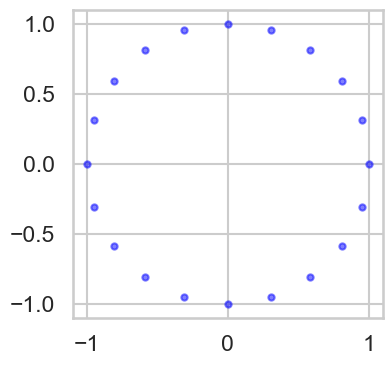

In [16]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
angle = np.linspace(0, 2*np.pi, 20, endpoint=False)
data = np.append([np.cos(angle)], [np.sin(angle)], 0).transpose()
sns.set_style("whitegrid")
sns.set_context("talk")
plt.rcParams['figure.figsize'] = [4,4]
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
print(type(X))
print(np.array(X).shape)
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X)

In [46]:
euclidean_4 = GUC_Kmean( X, 4,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
#euclidean_4_array_1 = euclidean_4[0]
#euclidean_4_array = np.array(euclidean_4_array_1)
print(type(euclidean_4_array))
print(np.array(euclidean_4_array).shape)
display_cluster(euclidean_4_array)

[[0.9609839241513629, 0.5217638805713913], [0.20179266158768216, -0.46660026709354674], [-0.861369695307451, 0.07325123624090923], [0.6039880382777492, -0.2857910072174672]]
[0.96098392 0.52176388]
[0.00152225 0.9234901 ]
[0. 0.]


ValueError: setting an array element with a sequence.

In [ ]:
pearson_4 = GUC_Kmean( X, 4,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_4_array_1 = pearson_4[0]
pearson_4_array = np.array(pearson_4_array_1)
print(type(pearson_4_array))
print(np.array(pearson_4_array).shape)
display_cluster(pearson_4_array)

In [ ]:
euclidean_6 = GUC_Kmean( X, 6,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
euclidean_6_array_1 = euclidean_6[0]
euclidean_6_array = np.array(euclidean_6_array_1)
print(type(euclidean_6_array))
print(np.array(euclidean_6_array).shape)
display_cluster(euclidean_6_array)

In [ ]:
pearson_6 = GUC_Kmean( X, 6,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_6_array_1 = pearson_6[0]
pearson_6_array = np.array(pearson_6_array_1)
print(type(pearson_6_array))
print(np.array(pearson_6_array).shape)
display_cluster(pearson_6_array)

In [ ]:
euclidean_8 = GUC_Kmean( X, 8,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
euclidean_8_array_1 = euclidean_8[0]
euclidean_8_array = np.array(euclidean_8_array_1)
print(type(euclidean_8_array))
print(np.array(euclidean_8_array).shape)
display_cluster(euclidean_8_array)

In [ ]:
pearson_8 = GUC_Kmean( X, 8,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_8_array_1 = pearson_8[0]
pearson_8_array = np.array(pearson_8_array_1)
print(type(pearson_8_array))
print(np.array(pearson_8_array).shape)
display_cluster(pearson_8_array)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

In [ ]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)
print(type(X))
print(np.array(X).shape)

In [ ]:
euclidean_4 = GUC_Kmean( X, 4,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
euclidean_4_array_1 = euclidean_4[0]
euclidean_4_array = np.array(euclidean_4_array_1)
print(type(euclidean_4_array))
print(np.array(euclidean_4_array).shape)
display_cluster(euclidean_4_array)

In [ ]:
pearson_4 = GUC_Kmean( X, 4,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_4_array_1 = pearson_4[0]
pearson_4_array = np.array(pearson_4_array_1)
print(type(pearson_4_array))
print(np.array(pearson_4_array).shape)
display_cluster(pearson_4_array)

In [ ]:
euclidean_6 = GUC_Kmean( X, 6,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
euclidean_6_array_1 = euclidean_6[0]
euclidean_6_array = np.array(euclidean_6_array_1)
print(type(euclidean_6_array))
print(np.array(euclidean_6_array).shape)
display_cluster(euclidean_6_array)

In [ ]:
pearson_6 = GUC_Kmean( X, 6,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_6_array_1 = pearson_6[0]
pearson_6_array = np.array(pearson_6_array_1)
print(type(pearson_6_array))
print(np.array(pearson_6_array).shape)
display_cluster(pearson_6_array)

In [ ]:
euclidean_8 = GUC_Kmean( X, 8,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
euclidean_8_array_1 = euclidean_8[0]
euclidean_8_array = np.array(euclidean_8_array_1)
print(type(euclidean_8_array))
print(np.array(euclidean_8_array).shape)
display_cluster(euclidean_8_array)

In [ ]:
pearson_8 = GUC_Kmean( X, 8,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_8_array_1 = pearson_8[0]
pearson_8_array = np.array(pearson_8_array_1)
print(type(pearson_8_array))
print(np.array(pearson_8_array).shape)
display_cluster(pearson_8_array)

#### 2.3. Example 3 : moons Data Gen and display 

In [ ]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X)
print(type(X))
print(np.array(X).shape)

In [ ]:
euclidean_4 = GUC_Kmean( X, 4,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
euclidean_4_array_1 = euclidean_4[0]
euclidean_4_array = np.array(euclidean_4_array_1)
print(type(euclidean_4_array))
print(np.array(euclidean_4_array).shape)
display_cluster(euclidean_4_array)

In [ ]:
pearson_4 = GUC_Kmean( X, 4,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_4_array_1 = pearson_4[0]
pearson_4_array = np.array(pearson_4_array_1)
print(type(pearson_4_array))
print(np.array(pearson_4_array).shape)
display_cluster(pearson_4_array)

In [ ]:
euclidean_6 = GUC_Kmean( X, 6,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
euclidean_6_array_1 = euclidean_6[0]
euclidean_6_array = np.array(euclidean_6_array_1)
print(type(euclidean_6_array))
print(np.array(euclidean_6_array).shape)
display_cluster(euclidean_6_array)

In [ ]:
pearson_6 = GUC_Kmean( X, 6,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_6_array_1 = pearson_6[0]
pearson_6_array = np.array(pearson_6_array_1)
print(type(pearson_6_array))
print(np.array(pearson_6_array).shape)
display_cluster(pearson_6_array)

In [ ]:
euclidean_8 = GUC_Kmean( X, 8,  Distance_Type='euclidean', max_iterations=100, tolerance=1e-4 )
euclidean_8_array_1 = euclidean_8[0]
euclidean_8_array = np.array(euclidean_8_array_1)
print(type(euclidean_8_array))
print(np.array(euclidean_8_array).shape)
display_cluster(euclidean_8_array)

In [ ]:
pearson_8 = GUC_Kmean( X, 8,  Distance_Type='pearson', max_iterations=100, tolerance=1e-4 )
pearson_8_array_1 = pearson_8[0]
pearson_8_array = np.array(pearson_8_array_1)
print(type(pearson_8_array))
print(np.array(pearson_8_array).shape)
display_cluster(pearson_8_array)

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def calculate_cluster_metrics(true_labels, predicted_labels, data):
    """
    Calculate cluster performance metrics.

    Parameters:
    - true_labels: True labels of the data points.
    - predicted_labels: Predicted labels assigned by the clustering algorithm.
    - data: The data matrix used for clustering.

    Returns:
    - silhouette: Silhouette Score.
    - calinski_harabasz: Calinski-Harabasz Index.
    - davies_bouldin: Davies-Bouldin Index.
    """
    silhouette = silhouette_score(data, predicted_labels)
    calinski_harabasz = calinski_harabasz_score(data, predicted_labels)
    davies_bouldin = davies_bouldin_score(data, predicted_labels)

    return silhouette, calinski_harabasz, davies_bouldin

# Example usage:
# Replace true_labels, predicted_labels, and data with your actual data
true_labels = [0, 1, 0, 1, 0, 1]
predicted_labels = [1, 0, 1, 0, 1, 0]
data = [[1, 2], [3, 4], [5, 6], [7, 8], [9, 10], [11, 12]]

silhouette, calinski_harabasz, davies_bouldin = calculate_cluster_metrics(true_labels, predicted_labels, data)

print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Index:", calinski_harabasz)
print("Davies-Bouldin Index:", davies_bouldin)

In [ ]:
calculate_cluster_metrics()

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 